# Tommy Nguyen
# 5/21/21


##CS286 Final exam
##Spring 2021
###Due: university-scheduled exam date of May 21 2021, 17:00pm (submission site stays open until 23:59pm)

You may work together with your project team, and submit one solution for all team members; you can also do the final on your own if you prefer. If you work in a team, all team members will get the same grade. Everyone on your team should contribute to the solution and understand the solution (not one person doing all the work). Oral examination may be requested.

You are given 14,004 protein sequences to classify, linked on the Canvas final page. 
We are going to use an open-access public dataset of protein sequences , originating from [DeepLoc](http://www.cbs.dtu.dk/services/DeepLoc-1.0/data.php). The dataset is a fasta file composed of headers and protein sequences. The header is composed of the accession number from Uniprot, the annotated subcellular localization and possibly a description field indicating if the protein was part of the test set. The subcellular localization includes an additional label, where S indicates soluble, M membrane and U unknown (you can ignore this label for our purposes). A sample of the data is as follows:

```

$ head deeploc_data.fasta 
>Q9H400 Cell.membrane-M test
MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP
>Q5I0E9 Cell.membrane-M
MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRTE



$ tail deeploc_data.fasta 
>V5NC32 Extracellular-S
MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVAGGGTAGLVVASRLSENSDWNILVIEAGPSNKDTPETRVPGLADSLPGSRTDWNYTTIPQDALGGRSLNYSRAKVLGGCSTHNGMVYTRGSEDDWNYWAEVTGDQALSWDSVLPIMKKAEKFSQDFSDQSVDGHIDPAVHGRDGLLSVVASYTNVSFNDLLLQTTKELSDEFPFKLDLNDGKPHELAWTQYTIDHNAERSSSATSYLETTGDNVHVLVNTHVTRIVSAGNGTNFRSVEFAVDSNSPKKVLQAKKELILSAGVIASPQVLMNSGIGGREELQAIGVDTLIDNPSVGKNLSDQAATLLMFDTTLPNTDYDVAAALTEWDKSRSGPMAHGARLNHLTWVRLPDDKLNGSDPSSGKDSPHIEFQFRQISHQLPPADVPNQVQLPDPDSIGVVLQFSVVNLYSISPGSVILNDNDPFANPMIDLNMFGDQKDIAILREGVRSARRMFSSPAFKDVINGTVYPPADVTSDEDLDAFLRTSAESYWHGVGTLSMSPQNASWGVVNPDFRVKGTSGLRVVDASVIPRAPAGHTQVPVYTFAEHASVLIAASYH
>P86368 Extracellular-S
SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFVHDCCYGNLPDCNPKSDRYKYKRVNGAIVCEQGTSCENRICECDKAAAICFRRNLNTYSKIYMLYPDFLCKGELKC
>P80156 Extracellular-S
TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTATCPTVKPHEQITCCSTDNCNPHPKMKQ
>Q8NIH1 Extracellular-S
MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSYMSSDDMKLKQPAIASLSGGNYVDTATEVVKRMMPGMTFRMADDHYVGESGISHLYFRQTMHGMDIDNADFNVNIGKDGKVLSFGHSFYTGPAPDRAPVEKRDFSGPMRAFHGACKALNLPINADKATIQTMNEHEVMFVGTSGAMSDPQGKLCYMAKEDGTLALTWRVETDMGDNWLLSYVDAKETDKVHNVVDYVSHATYQVYRWPIPDPTEGKREIVENPWNLKTSPFTWISDGKTNYTTTRGNNAIAQANFDGGEDYLNNYRPNSKNLKFEYPYAPNMSPPKSYIDASVTQLFYSANIVHDLYYMLGFTEKAGNFQVNNHGQGGKGNDFVILNAQDGSGTNNANFATPPDGKPGRMRVYIWTKAKPARDSSFEAGTVIHEYTHGLSNRLCGGPANSGCLNGMESGGMGEGWGDFFATAIRLKPNDNRNANYVHGEWVNNSPKGNRLYPYSTNLQTNPLVYTSCNKYNEVHAIGTVWCSILYEVLWNLIDKHGKNDGPTPVFENGVPNDGKYLAMKLVLDGMAIQPCKPTFVQARDAIIDADMNLTKGSNKCELWKAFAKRGLGVGAKYDPKNRTGSKAVPKECQ
>D4APA9 Extracellular-S
MGFITKAIPLALAAASVINGAEIMETRAGVQTLADKYIVVMNDGMTDKDFDSHRSWVNRTHRRRLIRRGAKAMGGMKHTYRFPTGLKGYSGHFDEQMINEISKRADVKYIERDARVQINAIEQQDNVPSWGLARVGSKEPGGTTYYYDGTAGEGSTAYVIDTGTDIQHEEFEGRATWGANFVDDMDMDCNGHGTHVSGTIGGKTFGVAKKSNVVAVKVLDCNGSGSNSGVIMGMEWATKDAQQKGADKAVANMSLGGAFSQASNDAAAAIAKGGVFLAVAAGNDNVDAADSSPASEPSICTVAASTEQDSKADFSNFGQVVDVYAPGDSITSAKPGGGSQVLSGTSMATPHVAGLGAYLIGLGKGGGPGLCDTIKQTAIDVIQNPGASTTSKLINNGSGIGFLSFPLNIYEEQWSKLFDL



$ egrep "^>" deeploc_data.fasta | wc
   14004   30781  319857


###These are the 11 subcellular localication annotations:

$ egrep "^>" deeploc_data.fasta | sed "s/^>.* //g" | sed "s/-.$//g" | sort | uniq
Cell.membrane
Cytoplasm
Cytoplasm-Nucleus
Endoplasmic.reticulum
Extracellular
Golgi.apparatus
Lysosome/Vacuole
Mitochondrion
Nucleus
Peroxisome
Plastid

```







##Task

Your task is to train machine learning that clasifies these proteins into those 11 subcellular localization groups (as we did in the worksheets, except for amino acid sequences this time). You can use amino acids or k-mers of amino acids as words (choose k yourself). Train **any two ML methods amongst these** (any 2 that you prefer) so you can compare them:

- Any two of the ML methods we saw in the class. Train the model to clasify the proteins into the 11 groups. Evaluate the classification result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. See [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

- A simple k-means (unsupervised clustering, the same method used in vector quantization) to cluster into 11 groups. Evaluate result by assigning the majority class to each cluster, then counting how many members of each cluster belong to classes other than the assigned one.

- Use the ProtBERT that is given [here](https://github.com/aws-samples/amazon-sagemaker-protein-classification). Evaluate result with Accuracy/Precision/Recall, as we have seen in the class and worksheets. This is sample code for BERT that does the assigned task, though you may google as well to find code.

- You may also use ML methods we didn't cover in detail in class, such as SVMs or decision trees or random forests. 

##Answer this question

Which of the 2 methods you compared gave a better result for separating proteins into the 11 subcellular localization classes? Explain in your answer why one method gave better results than another. If the metrics (Accuracy/Precision/Recall) are inconclusive as to which method performed better overall - for example if one method has better precision but another has better recall - explain this in your answer.

#Upload & install data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving deeploc_data.fasta to deeploc_data.fasta
User uploaded file "deeploc_data.fasta" with length 7650134 bytes


In [ ]:
# install biopython for Google Colab
try:
    import google.colab
    !pip install biopython
except ImportError:
    pass

     |████████████████████████████████| 2.3MB 3.0MB/s 


#Preprocessing, standardization, encoding, and SVM and decision tree model metrics and results

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
# parse fasta file and extract description and sequences
from Bio import SeqIO

identifiers = []
headers = []
with open('deeploc_data.fasta') as fasta_file:  
    # generator to append each header and sequence
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):
        headers.append(seq_record.description)  
        identifiers.append(str(seq_record.seq))

s1 = pd.Series(identifiers, name='Sequence')

s1_h = pd.Series(headers, name='Header')

deeploc = pd.concat([s1, s1_h], axis=1)
deeploc


,Sequence,Header
0,MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...,Q9H400 Cell.membrane-M test
1,MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...,Q5I0E9 Cell.membrane-M
2,MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...,P63033 Cell.membrane-M
3,MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...,Q9NR71 Cell.membrane-M
4,MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...,Q86XT9 Cell.membrane-M
...,...,...
13999,MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVA...,V5NC32 Extracellular-S
14000,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,P86368 Extracellular-S
14001,TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTAT...,P80156 Extracellular-S
14002,MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSY...,Q8NIH1 Extracellular-S


In [ ]:
# Select subcellular location of the header
deeploc['Subcellular location'] = deeploc['Header'].str.split(' ').str[1]

In [ ]:
deeploc['Subcellular location'].unique()

array(['Cell.membrane-M', 'Cytoplasm-Nucleus-U', 'Cytoplasm-S',
       'Endoplasmic.reticulum-M', 'Endoplasmic.reticulum-U',
       'Endoplasmic.reticulum-S', 'Golgi.apparatus-M',
       'Golgi.apparatus-U', 'Golgi.apparatus-S', 'Lysosome/Vacuole-M',
       'Lysosome/Vacuole-U', 'Lysosome/Vacuole-S', 'Mitochondrion-U',
       'Mitochondrion-M', 'Mitochondrion-S', 'Nucleus-U', 'Nucleus-M',
       'Nucleus-S', 'Peroxisome-M', 'Peroxisome-U', 'Peroxisome-S',
       'Plastid-U', 'Plastid-S', 'Plastid-M', 'Extracellular-S'],
      dtype=object)

In [ ]:
# replacing - with _ in Cytoplasm Nucleus
deeploc['Subcellular location'].replace({'Cytoplasm-Nucleus-U':'Cytoplasm_Nucleus-U'}, inplace=True)

In [ ]:
deeploc['Subcellular location'].unique()

array(['Cell.membrane-M', 'Cytoplasm_Nucleus-U', 'Cytoplasm-S',
       'Endoplasmic.reticulum-M', 'Endoplasmic.reticulum-U',
       'Endoplasmic.reticulum-S', 'Golgi.apparatus-M',
       'Golgi.apparatus-U', 'Golgi.apparatus-S', 'Lysosome/Vacuole-M',
       'Lysosome/Vacuole-U', 'Lysosome/Vacuole-S', 'Mitochondrion-U',
       'Mitochondrion-M', 'Mitochondrion-S', 'Nucleus-U', 'Nucleus-M',
       'Nucleus-S', 'Peroxisome-M', 'Peroxisome-U', 'Peroxisome-S',
       'Plastid-U', 'Plastid-S', 'Plastid-M', 'Extracellular-S'],
      dtype=object)

In [ ]:
# Select the subcellular location and not the additional labels
deeploc['Subcellular location'] = deeploc['Subcellular location'].str.split('-').str[0]

In [ ]:
print(deeploc['Subcellular location'].unique())
print(deeploc['Subcellular location'].nunique())

['Cell.membrane' 'Cytoplasm_Nucleus' 'Cytoplasm' 'Endoplasmic.reticulum'
 'Golgi.apparatus' 'Lysosome/Vacuole' 'Mitochondrion' 'Nucleus'
 'Peroxisome' 'Plastid' 'Extracellular']
11


In [ ]:
deeploc

,Sequence,Header,Subcellular location
0,MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...,Q9H400 Cell.membrane-M test,Cell.membrane
1,MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...,Q5I0E9 Cell.membrane-M,Cell.membrane
2,MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...,P63033 Cell.membrane-M,Cell.membrane
3,MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...,Q9NR71 Cell.membrane-M,Cell.membrane
4,MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...,Q86XT9 Cell.membrane-M,Cell.membrane
...,...,...,...
13999,MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVA...,V5NC32 Extracellular-S,Extracellular
14000,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,P86368 Extracellular-S,Extracellular
14001,TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTAT...,P80156 Extracellular-S,Extracellular
14002,MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSY...,Q8NIH1 Extracellular-S,Extracellular


In [ ]:
deeploc.drop('Header', axis=1, inplace=True)

In [ ]:
deeploc

,Sequence,Subcellular location
0,MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...,Cell.membrane
1,MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...,Cell.membrane
2,MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...,Cell.membrane
3,MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...,Cell.membrane
4,MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...,Cell.membrane
...,...,...
13999,MFPRVVRLNSRLVSFALLGLQIANGAITYQHPDDLPSNVNYDFIVA...,Extracellular
14000,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,Extracellular
14001,TKCYKTGDRIISEACPPGQDLCYMKTWCDVFCGTRGRVIELGCTAT...,Extracellular
14002,MHGLLLAAAGLLSLPLHVVAHPQPSTSLAGRGVDLDAYRMADRSSY...,Extracellular


In [ ]:
# deeploc=deeploc.replace(to_replace='Cell.membrane',value="1")
# deeploc=deeploc.replace(to_replace='Cytoplasm_Nucleus',value="2")
# deeploc=deeploc.replace(to_replace='Cytoplasm',value="3")
# deeploc=deeploc.replace(to_replace='Endoplasmic.reticulum',value="4")
# deeploc=deeploc.replace(to_replace='Golgi.apparatus',value="5")
# deeploc=deeploc.replace(to_replace='Lysosome/Vacuole',value="6")
# deeploc=deeploc.replace(to_replace='Mitochondrion',value="7")
# deeploc=deeploc.replace(to_replace='Nucleus',value="8")
# deeploc=deeploc.replace(to_replace='Peroxisome',value="9")
# deeploc=deeploc.replace(to_replace='Plastid',value="10")
# deeploc=deeploc.replace(to_replace='Extracellular',value="11")

In [ ]:
deeploc_train_set, deeploc_test_set = train_test_split(deeploc, 
                                                       test_size = 0.25, 
                                                       random_state = 7)

In [ ]:
deeploc_train_labels = deeploc_train_set['Subcellular location'].copy()
deeploc_test_labels = deeploc_test_set['Subcellular location'].copy()

In [ ]:
deeploc_train_labels

13056    Extracellular
797      Cell.membrane
11672          Plastid
8650           Nucleus
5916     Mitochondrion
             ...      
5699     Mitochondrion
10742          Nucleus
537      Cell.membrane
9412           Nucleus
12463    Extracellular
Name: Subcellular location, Length: 10503, dtype: object

In [ ]:
deeploc_test_labels

8511             Nucleus
8842             Nucleus
4896     Golgi.apparatus
11480            Plastid
12012            Plastid
              ...       
390        Cell.membrane
13837      Extracellular
8795             Nucleus
13841      Extracellular
7044       Mitochondrion
Name: Subcellular location, Length: 3501, dtype: object

In [ ]:
#create counts for every amino acid for the training set
deeploc_train_set = pd.DataFrame([ProteinAnalysis(i).count_amino_acids() for i in deeploc_train_set['Sequence']])
deeploc_train_set


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,40,6,33,29,28,29,17,33,32,60,8,30,30,18,16,45,31,47,4,15
1,59,5,22,23,35,53,11,41,22,63,26,34,39,20,26,60,34,40,10,17
2,25,1,6,9,7,18,2,6,11,12,4,7,9,1,1,14,13,19,0,3
3,37,3,24,44,17,28,5,16,19,42,14,18,29,26,22,52,30,23,9,10
4,10,0,8,17,3,14,3,6,9,16,5,9,7,8,5,12,14,15,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,21,5,12,27,14,18,10,18,20,46,9,9,14,18,27,24,22,15,6,10
10499,11,2,23,26,4,8,5,15,22,33,7,9,8,12,14,23,13,12,3,11
10500,12,1,6,10,8,6,3,5,6,18,4,4,6,6,6,12,5,6,2,4
10501,15,4,17,26,13,18,4,25,19,29,9,15,21,13,18,30,17,24,7,11


In [ ]:
#create counts for every amino acid for the test set
deeploc_test_set = pd.DataFrame([ProteinAnalysis(i).count_amino_acids() for i in deeploc_test_set['Sequence']])
deeploc_test_set

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,116,5,26,46,14,65,20,64,65,104,24,62,97,183,47,111,127,61,5,9
1,31,3,11,10,8,16,2,4,13,23,7,6,37,21,15,41,18,14,4,15
2,15,10,14,20,20,22,17,26,21,46,18,16,26,14,19,23,22,31,17,22
3,28,3,16,17,9,16,5,20,17,30,15,14,31,9,19,31,13,25,2,10
4,31,9,22,28,23,31,16,23,33,42,9,21,19,17,21,43,32,37,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,35,11,14,13,17,12,5,31,18,42,8,11,22,10,18,35,31,32,10,15
3497,6,7,3,9,6,3,0,1,7,7,5,2,3,1,5,8,1,7,3,3
3498,49,8,38,27,12,25,7,8,31,31,10,7,35,14,17,44,9,10,4,9
3499,2,8,3,4,2,3,2,4,5,3,0,5,3,1,2,3,9,2,2,3


In [ ]:
tidy_aminoacids = deeploc_train_set.melt(
    var_name="Amino acid", 
    value_name="Count" 
)
tidy_aminoacids

,Amino acid,Count
0,A,40
1,A,59
2,A,25
3,A,37
4,A,10
...,...,...
210055,Y,10
210056,Y,11
210057,Y,4
210058,Y,11


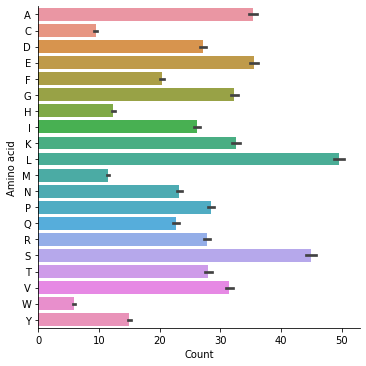

In [ ]:
# visualize distribution of amino acid counts of the training set 
sns.catplot(data=tidy_aminoacids,
            x='Count',
            y='Amino acid',
            kind='bar')

In [ ]:
# Pipeline
num_vars = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
# cat_vars = ['Subcellular location']
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),      
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_vars),
        ])

deeploc_train_prepared = full_pipeline.fit_transform(deeploc_train_set)
deeploc_test_prepared = full_pipeline.fit_transform(deeploc_test_set)

In [ ]:
deeploc_train_prepared

array([[ 1.41683279e-01, -2.84858133e-01,  2.37157442e-01, ...,
         5.76927917e-01, -3.19354949e-01, -1.18003314e-03],
       [ 7.28400234e-01, -3.67181138e-01, -2.06157297e-01, ...,
         3.16455825e-01,  6.84791852e-01,  1.53743568e-01],
       [-3.21514317e-01, -6.96473158e-01, -8.50978734e-01, ...,
        -4.64960452e-01, -9.88786150e-01, -9.30721641e-01],
       ...,
       [-7.22952234e-01, -6.96473158e-01, -8.50978734e-01, ...,
        -9.48694337e-01, -6.54070550e-01, -8.53259841e-01],
       [-6.30312715e-01, -4.49504143e-01, -4.07663996e-01, ...,
        -2.78908957e-01,  1.82718451e-01, -3.11027236e-01],
       [-7.44755994e-02, -2.02535128e-01, -4.49519372e-02, ...,
         1.87734337e-02,  1.68893865e+00,  5.41052572e-01]])

In [ ]:
deeploc_test_prepared

array([[ 2.41019785, -0.39685937, -0.05156201, ...,  0.90731013,
        -0.17183013, -0.4125711 ],
       [-0.14815282, -0.56545598, -0.48136818, ..., -0.56894502,
        -0.3360609 , -0.0100786 ],
       [-0.62972471,  0.02463215, -0.39540694, ..., -0.03498039,
         1.79893907,  0.45949599],
       ...,
       [ 0.39361556, -0.14396446,  0.29228293, ..., -0.69458376,
        -0.3360609 , -0.4125711 ],
       [-1.02100187, -0.14396446, -0.71059813, ..., -0.94586123,
        -0.66452243, -0.8150636 ],
       [ 0.06253488, -0.22826276, -0.02290826, ...,  0.40475518,
         0.6493237 ,  0.19116765]])

In [ ]:
# hotencoder = OneHotEncoder()
# deeploc_labels_dataframe = deeploc_train_labels.to_frame()
# train_label_1hot = hotencoder.fit_transform(deeploc_labels_dataframe)
# train_label_1hot = train_label_1hot.toarray()
# encode the training set labels by ordinal encoding
ordinal_encoder = OrdinalEncoder()
deeploc_labels_dataframe = deeploc_train_labels.to_frame()
train_labels_encoded = ordinal_encoder.fit_transform(deeploc_labels_dataframe).ravel()
train_labels_encoded[:10]

array([ 4.,  0., 10.,  8.,  7.,  3.,  1.,  0.,  0.,  1.])

In [ ]:
ordinal_encoder.categories_

[array(['Cell.membrane', 'Cytoplasm', 'Cytoplasm_Nucleus',
        'Endoplasmic.reticulum', 'Extracellular', 'Golgi.apparatus',
        'Lysosome/Vacuole', 'Mitochondrion', 'Nucleus', 'Peroxisome',
        'Plastid'], dtype=object)]

In [ ]:
# deeploc_labels_dataframe_test = deeploc_test_labels.to_frame()
# test_label_1hot = hotencoder.fit_transform(deeploc_labels_dataframe_test)
# test_label_1hot = test_label_1hot.toarray()
# encode the test set labels by ordinal encoding
deeploc_test_dataframe = deeploc_test_labels.to_frame()
test_labels_encoded = ordinal_encoder.fit_transform(deeploc_test_dataframe).ravel()
test_labels_encoded[:10]

array([ 8.,  8.,  5., 10., 10.,  8.,  4.,  4.,  1.,  7.])

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# def get_metrics(tset, pred):
#   accuracy = accuracy_score(tset, pred)
#   precision = precision_score(tset, labes, average='weighted')
#   recall = recall_score(tset, pred, average='weighted')
#   return accuracy, precision, recall
# get_metrics(deeploc_test_set, svm_predict)
# print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f" % (accuracy, precision, recall))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# decision tree model
dt_model = DecisionTreeClassifier(random_state = 7)
dt_model.fit(deeploc_train_prepared, train_labels_encoded)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [ ]:
# decision tree predicting test set
dt_predict = dt_model.predict(deeploc_test_prepared)

In [ ]:
# decision tree ten-fold cross-validation
dt_scores = cross_val_score(dt_model, deeploc_train_prepared, train_labels_encoded, cv = 10)
print("Decision Tree Accuracy CV = 5: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

Decision Tree Accuracy CV = 5: 0.40 (+/- 0.02)


In [ ]:
# svm model 
svm_model = svm.LinearSVC(random_state = 7, max_iter=30000, dual=False)
svm_model.fit(deeploc_train_prepared, train_labels_encoded)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=30000,
          multi_class='ovr', penalty='l2', random_state=7, tol=0.0001,
          verbose=0)

In [ ]:
# svm model predicting test set
svm_predict = svm_model.predict(deeploc_test_prepared)

In [ ]:
# svm model ten-fold cross-validation
svm_scores = cross_val_score(svm_model, deeploc_train_prepared, train_labels_encoded, cv = 10)
print("Support Vector Machine Accuracy CV = 10: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))

Support Vector Machine Accuracy CV = 10: 0.45 (+/- 0.01)


[[110  44   1  37  16  13  13  19  47   4  15]
 [ 36 211   7  24  29  15   7  52 219   5  29]
 [  2   6   4   1   2   1   0   3  15   0   0]
 [ 25  36   1  55  17  13   4  17  24   5  13]
 [ 26  51   3  15 269  12   8  30  66   3  16]
 [  3  10   1  16   6  13   2   8  13   0   7]
 [ 14  18   0  11  11   5   8   9  11   2   2]
 [ 31  72   7  27  44   7   6  81  85   7  32]
 [ 47 195  15  21  38  19  15  61 536   6  36]
 [  4  10   0   3   3   1   0   5   3   2   5]
 [ 13  48   1  19  14  11   6  21  31   4  43]]


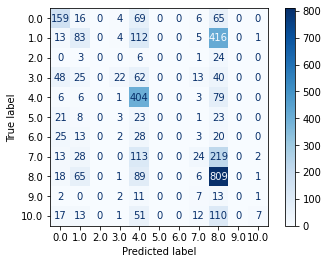

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       319
           1       0.32      0.13      0.19       634
           2       0.00      0.00      0.00        34
           3       0.55      0.10      0.18       210
           4       0.42      0.81      0.55       499
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        91
           7       0.30      0.06      0.10       399
           8       0.44      0.82      0.58       989
           9       0.00      0.00      0.00        36
          10       0.58      0.03      0.06       211

    accuracy                           0.43      3501
   macro avg       0.28      0.22      0.20      3501
weighted avg       0.39      0.43      0.35      3501



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# svm confusion matrix and metrics
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
print(metrics.confusion_matrix(test_labels_encoded, dt_predict))
plot_confusion_matrix(svm_model, deeploc_test_prepared, test_labels_encoded, cmap = "Blues", values_format='d')
plt.show()
print(metrics.classification_report(test_labels_encoded, svm_predict, target_names = target_names))

[[110  44   1  37  16  13  13  19  47   4  15]
 [ 36 211   7  24  29  15   7  52 219   5  29]
 [  2   6   4   1   2   1   0   3  15   0   0]
 [ 25  36   1  55  17  13   4  17  24   5  13]
 [ 26  51   3  15 269  12   8  30  66   3  16]
 [  3  10   1  16   6  13   2   8  13   0   7]
 [ 14  18   0  11  11   5   8   9  11   2   2]
 [ 31  72   7  27  44   7   6  81  85   7  32]
 [ 47 195  15  21  38  19  15  61 536   6  36]
 [  4  10   0   3   3   1   0   5   3   2   5]
 [ 13  48   1  19  14  11   6  21  31   4  43]]


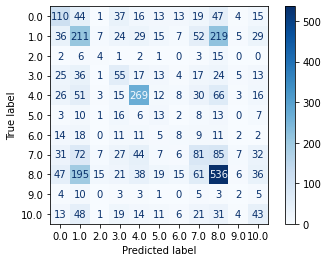

              precision    recall  f1-score   support

           0       0.35      0.34      0.35       319
           1       0.30      0.33      0.32       634
           2       0.10      0.12      0.11        34
           3       0.24      0.26      0.25       210
           4       0.60      0.54      0.57       499
           5       0.12      0.16      0.14        79
           6       0.12      0.09      0.10        91
           7       0.26      0.20      0.23       399
           8       0.51      0.54      0.53       989
           9       0.05      0.06      0.05        36
          10       0.22      0.20      0.21       211

    accuracy                           0.38      3501
   macro avg       0.26      0.26      0.26      3501
weighted avg       0.38      0.38      0.38      3501



In [ ]:
# decision tree confusion matrix and metrics
print(metrics.confusion_matrix(test_labels_encoded, dt_predict))
plot_confusion_matrix(dt_model, deeploc_test_prepared, test_labels_encoded, cmap = "Blues", values_format='d')
plt.show()
print(metrics.classification_report(test_labels_encoded, dt_predict, target_names = target_names))

# ANS
SVM linear classifer performed better than decision tree classifer. Precision (0.39), recall (0.43), and accuracy (0.43) of the SVM linear classifer were higher than the decision tree classifer (0.38, 0.26, 0.38, respectively). It is possible that SVM linear classifer performed better because the data set is more linear (which favors for SVM linear classifer). Even if the data was non-linear, the SVM model adapts to the non-linearity due to how flexible creating hyper-planes is. However, due to poor accuracy, precision, and recall, it is hard to say. Looking at the data, there were instances where there was not enough data for SVM to classify labels '2' and '9' (Cytoplasm_Nucleus & Peroxisome) while the decision tree model was able to classify them but with low precision and recall scores. Running 10-fold cross-validation between the SVM and decision tree models, SVM gave a higher accuracy score (0.45) compared to the decision tree model (0.40). 